# A first look at the TGASxWright catalog of stars closer than 125 pc

This is looking at the vot that resulted from the XMatch of the TGAs 125 pc catalog and the Wright et al catalog of spectral info for TGAS stars. The match was done by Visizer XMatch service. There are 29,834 source in the cross-matched catalog

Importing some modules (libraries) and giving them short names such as **np** and **plt**. You will find that most users will use these common ones.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Now lets use astropy table reader... because it is easier..

A file with the extension .vot is an virtual observatory table type. astropy knows this format: votable. Lets read the file into a structure "t". Nice work astropy people!

In [26]:
from astropy.table import Table
t = Table.read('tgas125xwright.vot', format='votable')

print(t)



      d_arcsec            _RAJ2000            _DEJ2000      ... Teff  SpType
        arcs                deg                 deg         ...  K          
-------------------- ------------------ ------------------- ... ---- -------
 0.58564499999999997 67.675125399999999 -69.420808100000002 ... 5150   G5 IV
  2.8163619999999998 178.23818900000001 -27.327860600000001 ... 5770    G6 V
 0.29380600000000001        149.2881721          20.6061956 ... 4750      K0
 0.19058800000000001 239.59810830000001  47.117454199999997 ... 6030      G0
 0.98780500000000004 316.64883630000003 -16.076314700000001 ... 5150 G6 IV/V
 0.52508500000000002 68.163989999999998 -69.367459100000005 ... 6440    F5 V
 0.94533400000000001        149.5146508  20.982501299999999 ... 6440      F5
            2.801396 178.27381890000001 -27.308091699999999 ... 6030    G0 V
 0.86115600000000003 314.86543890000002         -16.8795991 ... 6890  F3/5 V
  2.1731660000000002 66.441037199999997 -69.993685200000002 ... 5860    G2 V

## Access to values within the table...

Astropy reads both the header information and the ascii column information. The data in the columns of the table go into the structure with labels corresponding to the column header title... for example

In [27]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Mag', 'Teff', 'SpType']


## so you can access, for example, the parallax, or phot_g_mean_mag

In [28]:
print(t["Source","d_arcsec","__Gmag_","VTmag","Teff","SpType"])

       Source             d_arcsec        __Gmag_    VTmag   Teff  SpType
                            arcs            mag       mag     K          
------------------- -------------------- --------- --------- ---- -------
4655830482578137344  0.58564499999999997 9.2159996 9.5489998 5150   G5 IV
3487237020257152640   2.8163619999999998 9.6499996 9.9200001 5770    G6 V
 627906248532034688  0.29380600000000001 9.0050001 9.3789997 4750      K0
1399531345558458880  0.19058800000000001 8.0950003 8.3100004 6030      G0
6882602216151398784  0.98780500000000004 9.8540001    10.186 5150 G6 IV/V
4655833952911711488  0.52508500000000002 9.5389996 9.7729998 6440    F5 V
 627954523964445952  0.94533400000000001     7.743     7.927 6440      F5
3487243033211366656             2.801396 8.6350002 8.8789997 6030    G0 V
6882818304546426752  0.86115600000000003 7.8629999 8.0459995 6890  F3/5 V
4655882675012240128   2.1731660000000002 7.6570001 7.9260001 5860    G2 V
                ...                  .

One way to check on the matches is that the G-band and V-band should be similar. For this particular cross match, matching should be very good because the Wright catalog targeted TGAS stars. This will not be true for cross matching with other sky-survey catalogs like 2MASS and WISE.

There are some very serious outliers in the first graph. In the second graph I tighten the Y-axis range to look more closely at the smaller differences. One expects a difference because the G band and V band are not the same. The G-band is a very wide filter.

Hmmmm. Outliers by more than 1 mag probably need to be looked at...

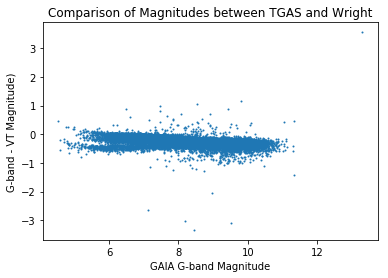

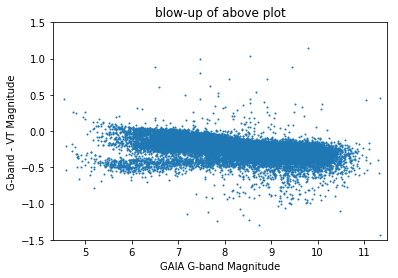

In [29]:
magdif = t["__Gmag_"] - t["VTmag"]
mags = t["__Gmag_"]
plt.xlabel("GAIA G-band Magnitude")
plt.ylabel("G-band - VT Magnitude)")
plt.title("Comparison of Magnitudes between TGAS and Wright")
plt.scatter(mags,magdif,s=1.0)
plt.show()

plt.ylim(-1.5,1.5)
plt.xlim(4.3,11.5)
plt.xlabel("GAIA G-band Magnitude")
plt.ylabel("G-band - VT Magnitude")
plt.title("blow-up of above plot")
plt.scatter(mags,magdif,s=1.0)
plt.show()


## Make some interesting plots

histograms of magnitudes, parallaxes, and distances

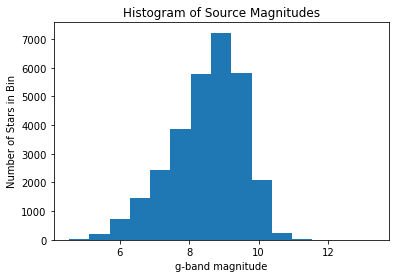

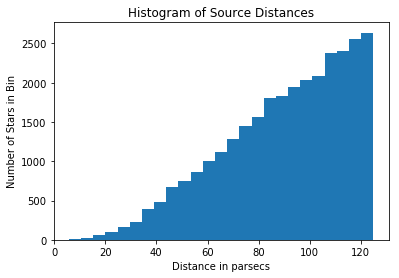

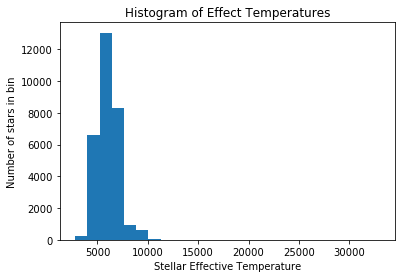

In [30]:
mags = t["__Gmag_"]

bins = 15
plt.xlabel('g-band magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source Magnitudes')
plmags=plt.hist(mags,bins)
plt.show()

para = t['Plx']
dist = 1000/para
bins = 25
plt.xlabel('Distance in parsecs')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source Distances')
plmags=plt.hist(dist,bins)
plt.show()

teff = t["Teff"]
bins = 25
plt.xlabel('Stellar Effective Temperature')
plt.ylabel('Number of stars in bin')
plt.title('Histogram of Effect Temperatures')
plmags = plt.hist(teff,bins)
plt.show()


Hmmm. Why is the Teff so sharply peaked around 4,000 to 8,000 K? 


## Now lets try some plots to look at the data in different ways.
Teff versus magnitude (this is apparent magnitude. 

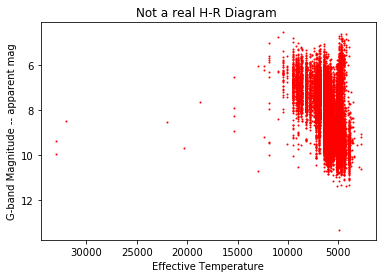

In [31]:
plt.xlabel('Effective Temperature')
plt.ylabel('G-band Magnitude -- apparent mag')
plt.title('Not a real H-R Diagram ')
plt.scatter(teff,mags,s=1.0,c='r')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

Ok. What is odd about the graph above which was also apparent in the histogram of Teff? Why aren't there more star with Teff below 5,000 or 4,000? And, what is up with the few stars that are very hot but still not that bright? 

Hmmm.  We have to look into those hot guys.

Next lets create the absolute magnitudes for the stars from the G-band mag and the distance. I have restricted the x-axis in the plot to give a better look at the data from Teff 3,200 to 12,000 K. The color is the distance as shown on the color bar.

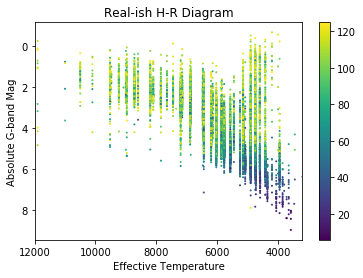

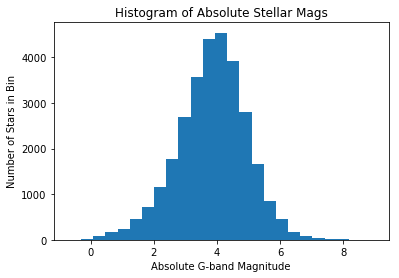

In [32]:
absmags = mags + 5 - 5 * np.log10(dist)
plt.xlabel('Effective Temperature')
plt.ylabel('Absolute G-band Mag')
plt.title('Real-ish H-R Diagram')

plt.scatter(teff,absmags,s=1.0,c=dist)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim(12000,3200)
plt.colorbar()
plt.show()

plt.xlabel("Absolute G-band Magnitude")
plt.ylabel("Number of Stars in Bin")
plt.title("Histogram of Absolute Stellar Mags")
plt.hist(absmags,bins)
plt.show()

Does the spread of the width of the "main sequence surprise you? The vertical dispersion between 9,000 K and 6,000 K where you have small contamination by the giant branch is >2 magnitudes peak-to-peak; 2 mag is roughly a factor of 6 in luminosity. We saw previously that the error in the distance was as large as ~15% which could be a 35-40% error in luminosity. We don't have good knowledge of the error in the Teff.

Hmmm. We need to think about possible reasons for the dispersion.

The histogram of absolute G-band magnitudes peaks around 4th mag. Is that consistent with what you expect? Why are there few stars brighter than 0 mag and few fainter than 7th mag?